In [90]:
import pandas as pd
import sqlite3
import os
import re
from PIL import Image
import matplotlib.pyplot as plt
import random

In [57]:
# File path to the CSV file
csv_file_path = "raw_data/poke_data.csv"

# Read the CSV file into a Pandas DataFrame
df_pokemon = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame to verify the data
df_pokemon

# Print column names
print(df_pokemon.columns)


#show rows 800-900
df_pokemon[810:850]


Index(['Unnamed: 0', 'pokedex_number', 'name', 'german_name', 'generation',
       'status', 'species', 'type_number', 'type_1', 'type_2', 'height_m',
       'weight_kg', 'abilities_number', 'ability_1', 'ability_2',
       'ability_hidden', 'total_points', 'hp', 'attack', 'defense',
       'sp_attack', 'sp_defense', 'speed', 'catch_rate', 'base_friendship',
       'base_experience', 'growth_rate', 'egg_type_number', 'egg_type_1',
       'egg_type_2', 'percentage_male', 'egg_cycles', 'against_normal',
       'against_fire', 'against_water', 'against_electric', 'against_grass',
       'against_ice', 'against_fight', 'against_poison', 'against_ground',
       'against_flying', 'against_psychic', 'against_bug', 'against_rock',
       'against_ghost', 'against_dragon', 'against_dark', 'against_steel',
       'against_fairy'],
      dtype='object')


,Unnamed: 0,pokedex_number,name,german_name,generation,status,species,type_number,type_1,type_2,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
810,810,701,Hawlucha,Resladero,6,Normal,Wrestling Pokémon,2,Fighting,Flying,...,0.0,2.0,2.0,0.25,1.0,1.0,1.0,0.5,1.00,2.0
811,811,702,Dedenne,Dedenne,6,Normal,Antenna Pokémon,2,Electric,Fairy,...,2.0,0.5,1.0,0.50,1.0,1.0,0.0,0.5,1.00,1.0
812,812,703,Carbink,Rocara,6,Normal,Jewel Pokémon,2,Rock,Fairy,...,2.0,0.5,1.0,0.50,1.0,1.0,0.0,0.5,4.00,1.0
813,813,704,Goomy,Viscora,6,Normal,Soft Tissue Pokémon,1,Dragon,NaN,...,1.0,1.0,1.0,1.00,1.0,1.0,2.0,1.0,1.00,2.0
814,814,705,Sliggoo,Viscargot,6,Normal,Soft Tissue Pokémon,1,Dragon,NaN,...,1.0,1.0,1.0,1.00,1.0,1.0,2.0,1.0,1.00,2.0
815,815,706,Goodra,Viscogon,6,Normal,Dragon Pokémon,1,Dragon,NaN,...,1.0,1.0,1.0,1.00,1.0,1.0,2.0,1.0,1.00,2.0
816,816,707,Klefki,Clavion,6,Normal,Key Ring Pokémon,2,Steel,Fairy,...,2.0,0.5,0.5,0.25,0.5,1.0,0.0,0.5,1.00,0.5
817,817,708,Phantump,Paragoni,6,Normal,Stump Pokémon,2,Ghost,Grass,...,0.5,2.0,1.0,1.00,1.0,2.0,1.0,2.0,1.00,1.0
818,818,709,Trevenant,Trombork,6,Normal,Elder Tree Pokémon,2,Ghost,Grass,...,0.5,2.0,1.0,1.00,1.0,2.0,1.0,2.0,1.00,1.0
819,819,710,Pumpkaboo Average Size,Irrbis,6,Normal,Pumpkin Pokémon,2,Ghost,Grass,...,0.5,2.0,1.0,1.00,1.0,2.0,1.0,2.0,1.00,1.0


In [58]:
# Get the list of column names to drop (columns starting with 'against')
columns_to_drop = [col for col in df_pokemon.columns if col.startswith('against')]

# Drop the specified columns from the DataFrame
df_pokemon.drop(columns=columns_to_drop, inplace=True)

#df_pokemon.head()

# show columns
df_pokemon.columns

Index(['Unnamed: 0', 'pokedex_number', 'name', 'german_name', 'generation',
       'status', 'species', 'type_number', 'type_1', 'type_2', 'height_m',
       'weight_kg', 'abilities_number', 'ability_1', 'ability_2',
       'ability_hidden', 'total_points', 'hp', 'attack', 'defense',
       'sp_attack', 'sp_defense', 'speed', 'catch_rate', 'base_friendship',
       'base_experience', 'growth_rate', 'egg_type_number', 'egg_type_1',
       'egg_type_2', 'percentage_male', 'egg_cycles'],
      dtype='object')

In [76]:

# Drop all rows past index 841
df_pokemon.drop(index=df_pokemon.index[841:], inplace=True)

# Reset the index after dropping rows
df_pokemon.reset_index(drop=True, inplace=True)

# Create a new DataFrame with rows up to index 841 (inclusive)
df_pokemon_clean = df_pokemon.loc[:841].copy()

# drop the uname column
df_pokemon_clean.drop(columns='Unnamed: 0', inplace=True)

#df_pokemon_clean

# show only rows with multiple of the same pokedex number
pd.set_option('display.max_rows', 1000)
df_pokemon_clean[df_pokemon_clean['pokedex_number'].duplicated(keep=False)].sort_values(by='pokedex_number')



,pokedex_number,name,german_name,generation,status,species,type_number,type_1,type_2,height_m,...,speed,catch_rate,base_friendship,base_experience,growth_rate,egg_type_number,egg_type_1,egg_type_2,percentage_male,egg_cycles
2,3,Venusaur,Bisaflor,1,Normal,Seed Pokémon,2,Grass,Poison,2.0,...,80,45.0,70.0,236.0,Medium Slow,2,Grass,Monster,87.5,20.0
3,3,Mega Venusaur,Bisaflor,1,Normal,Seed Pokémon,2,Grass,Poison,2.4,...,80,45.0,70.0,281.0,Medium Slow,2,Grass,Monster,87.5,20.0
6,6,Charizard,Glurak,1,Normal,Flame Pokémon,2,Fire,Flying,1.7,...,100,45.0,70.0,240.0,Medium Slow,2,Dragon,Monster,87.5,20.0
7,6,Mega Charizard X,Glurak,1,Normal,Flame Pokémon,2,Fire,Dragon,1.7,...,100,45.0,70.0,285.0,Medium Slow,2,Dragon,Monster,87.5,20.0
8,6,Mega Charizard Y,Glurak,1,Normal,Flame Pokémon,2,Fire,Flying,1.7,...,100,45.0,70.0,285.0,Medium Slow,2,Dragon,Monster,87.5,20.0
11,9,Blastoise,Turtok,1,Normal,Shellfish Pokémon,1,Water,NaN,1.6,...,78,45.0,70.0,239.0,Medium Slow,2,Monster,Water 1,87.5,20.0
12,9,Mega Blastoise,Turtok,1,Normal,Shellfish Pokémon,1,Water,NaN,1.6,...,78,45.0,70.0,284.0,Medium Slow,2,Monster,Water 1,87.5,20.0
18,15,Beedrill,Bibor,1,Normal,Poison Bee Pokémon,2,Bug,Poison,1.0,...,75,45.0,70.0,178.0,Medium Fast,1,Bug,NaN,50.0,15.0
19,15,Mega Beedrill,Bibor,1,Normal,Poison Bee Pokémon,2,Bug,Poison,1.4,...,145,45.0,70.0,223.0,Medium Fast,1,Bug,NaN,50.0,15.0
22,18,Pidgeot,Tauboss,1,Normal,Bird Pokémon,2,Normal,Flying,1.5,...,101,45.0,70.0,216.0,Medium Slow,1,Flying,NaN,50.0,15.0


In [65]:
# create sqlite database from pandas dataframe
db_file_path = 'sqlite_database/pokemon_db.sqlite'

# connect to database
conn = sqlite3.connect(db_file_path)

In [67]:
# create curser object
cursor = conn.cursor()


In [68]:
# Define the SQL query to create the table
create_table_query = """
CREATE TABLE IF NOT EXISTS pokemon_data (
    pokedex_number INTEGER PRIMARY KEY,
    name TEXT,
    german_name TEXT,
    generation INTEGER,
    status TEXT,
    species TEXT,
    type_number INTEGER,
    type_1 TEXT,
    type_2 TEXT,
    height_m REAL,
    weight_kg REAL,
    abilities_number INTEGER,
    ability_1 TEXT,
    ability_2 TEXT,
    ability_hidden TEXT,
    total_points INTEGER,
    hp INTEGER,
    attack INTEGER,
    defense INTEGER,
    sp_attack INTEGER,
    sp_defense INTEGER,
    speed INTEGER,
    catch_rate INTEGER,
    base_friendship INTEGER,
    base_experience INTEGER,
    growth_rate TEXT,
    egg_type_number INTEGER,
    egg_type_1 TEXT,
    egg_type_2 TEXT
)
"""

# Execute the query to create the table
cursor.execute(create_table_query)

In [69]:
# Insert data into the 'pokemon_data' table
df_pokemon_clean.to_sql('pokemon_data', conn, if_exists='replace', index=False)

841

In [70]:
# Commit changes to the database and close the connection
conn.commit()
conn.close()

In [129]:
# Connect to the SQLite database
db_file_path = 'sqlite_database/pokemon_db.sqlite'
conn = sqlite3.connect(db_file_path)
cursor = conn.cursor()

In [97]:
# Drop the "poke_image" table if it exists
drop_table_query = "DROP TABLE IF EXISTS poke_image;"
cursor.execute(drop_table_query)

# Create a table for storing image file paths
create_image_table_query = """
CREATE TABLE IF NOT EXISTS poke_image (
    image_id INTEGER PRIMARY KEY,
    pokedex_number INTEGER,
    image_path TEXT,
    FOREIGN KEY (pokedex_number) REFERENCES pokemon (pokedex_number)
)
"""

cursor.execute(create_image_table_query)

In [98]:
# Get the list of files in the 'poke_image' folder
image_folder = 'Images\poke_image'
image_files = os.listdir(image_folder)

In [99]:
# Insert image paths into the 'poke_image' table
for image_file in image_files:
    # Extract the pokedex_number from the file name using regular expressions
    pokedex_number_match = re.match(r'^(\d+)(?:-(.*))?\.png$', image_file)
    if pokedex_number_match:
        pokedex_number = int(pokedex_number_match.group(1))
        image_path = os.path.join(image_folder, image_file)

        # Insert the image file path into the 'poke_image' table
        insert_image_query = "INSERT INTO poke_image (pokedex_number, image_path) VALUES (?, ?)"
        cursor.execute(insert_image_query, (pokedex_number, image_path))


In [109]:
# Commit changes and close the connection
conn.commit()
conn.close()

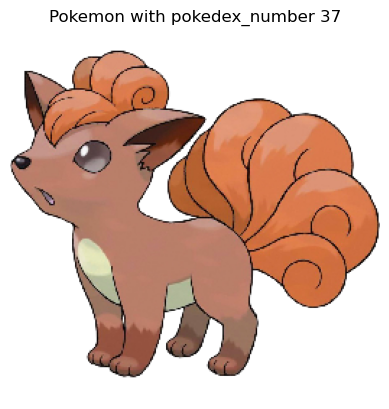

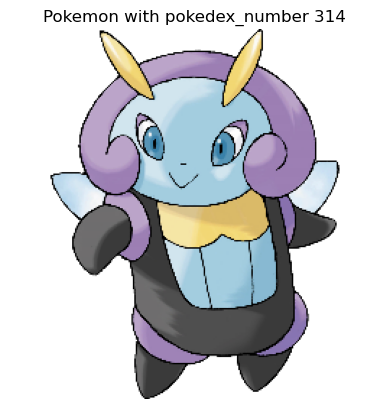

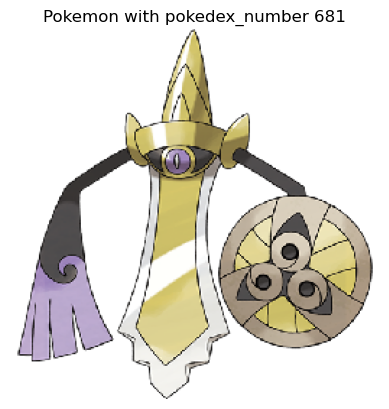

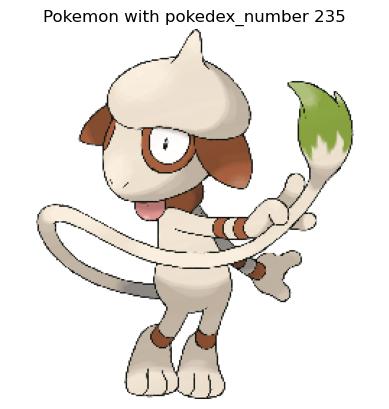

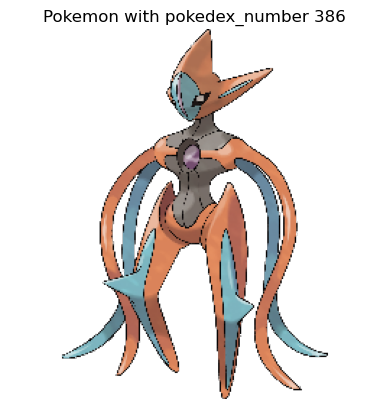

In [133]:
# Select a random set of N Pokemon to test
num_pokemon_to_test = 5  # Change this number as needed
pokemon_to_test = random.sample(range(1, 842), num_pokemon_to_test)  # Assuming 841 is the maximum pokedex_number

for pokedex_number_to_test in pokemon_to_test:
    # Write a SQL query to fetch the image path for the selected Pokemon
    query = "SELECT image_path FROM poke_image WHERE pokedex_number = ?"
    cursor.execute(query, (pokedex_number_to_test,))
    result = cursor.fetchone()

    # Check if the result is not empty (i.e., the Pokemon with the given pokedex_number exists)
    if result:
        image_path = result[0]
        # Load and display the image using PIL and Matplotlib
        img = Image.open(image_path)
        plt.imshow(img)
        plt.title(f"Pokemon with pokedex_number {pokedex_number_to_test}")
        plt.axis('off')
        plt.show()
    else:
        print(f"Pokemon with pokedex_number {pokedex_number_to_test} not found.")

In [124]:
conn.close()

In [114]:
# Connect to the SQLite database
db_file_path = 'sqlite_database/pokemon_db.sqlite'
conn = sqlite3.connect(db_file_path)
cursor = conn.cursor()

In [115]:
# Create the 'pokemon_moves' table if it doesn't exist
create_moves_table_query = """
CREATE TABLE IF NOT EXISTS pokemon_moves (
    id INTEGER PRIMARY KEY,
    pokedex_number INTEGER,
    move_name TEXT,
    move_type TEXT,
    FOREIGN KEY (pokedex_number) REFERENCES pokemon_data (pokedex_number)
)
"""

cursor.execute(create_moves_table_query)

In [117]:
# Fetch all unique pokedex_numbers from the 'pokemon_data' table
cursor.execute("SELECT DISTINCT pokedex_number FROM pokemon_data")
pokemon_numbers = cursor.fetchall()

# Loop through each unique pokedex_number and fetch its moves
for pokedex_number in pokemon_numbers:
    pokedex_number = pokedex_number[0]
    
    # Fetch moves for the current pokedex_number from the 'pokemon_data' table
    cursor.execute("SELECT ability_1, ability_2, ability_hidden FROM pokemon_data WHERE pokedex_number = ?", (pokedex_number,))
    moves = cursor.fetchone()

    # Insert moves into the 'pokemon_moves' table
    insert_moves_query = "INSERT INTO pokemon_moves (pokedex_number, move_name, move_type) VALUES (?, ?, ?)"
    for move_name in moves:
        if move_name:
            cursor.execute(insert_moves_query, (pokedex_number, move_name, 'ability'))

In [118]:
# Commit changes and close the connection
conn.commit()
conn.close()

In [119]:
conn.close()